In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
plt.style.use('ggplot')
import seaborn as sns

In [23]:
timeseries = pd.read_csv('imported data/datatest2.txt', parse_dates=True, index_col='date')
timeseries.drop('ind\"', axis=1, inplace=True)

In [24]:
timeseries.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [8]:
timeseries.info() # time series is our index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9752 entries, 2015-02-11 14:48:00 to 2015-02-18 09:19:00
Data columns (total 7 columns):
ind"             9752 non-null int64
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(2)
memory usage: 609.5 KB


In [10]:
# sophisticated date time indexing using loc
timeseries.loc["2015-02-11 14:50:00",'Light']  # what is light exposure at this specific time

434.0

In [14]:
## or maybe just selecting the whole year
# this is called partial datetime string selection
timeseries.loc["2015-02-15"].count()

ind"             1440
Temperature      1440
Humidity         1440
Light            1440
CO2              1440
HumidityRatio    1440
Occupancy        1440
dtype: int64

In [18]:
timeseries.loc["Feb-15-2015"].head()

,"ind""",Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-15 00:00:00,4873,19.89,35.745,0.0,535.500000,0.005139,0
2015-02-15 00:01:00,4874,19.89,35.700,0.0,541.000000,0.005132,0
2015-02-15 00:02:00,4875,20.00,35.700,0.0,539.333333,0.005168,0
2015-02-15 00:03:00,4876,20.00,35.700,0.0,541.000000,0.005168,0
2015-02-15 00:04:00,4877,20.00,35.700,0.0,542.000000,0.005168,0


In [20]:
### slicing between partial datetime strings .loc[start:stop]
timeseries.loc["Feb-15-2015 00:00:000": 'Feb-16-2015'].describe()

,"ind""",Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,6312.500000,20.838469,29.861043,114.353252,738.830339,0.004547,0.191319
std,831.528713,0.778051,2.576111,180.163030,132.983383,0.000388,0.393408
min,4873.000000,19.856667,24.290000,0.000000,529.333333,0.003593,0.000000
25%,5592.750000,20.290000,28.267500,0.000000,636.937500,0.004433,0.000000
50%,6312.500000,20.390000,30.166667,0.000000,717.000000,0.004615,0.000000
75%,7032.250000,21.525000,31.825417,203.333333,852.000000,0.004864,0.000000
max,7752.000000,23.290000,35.745000,576.000000,1061.000000,0.005168,1.000000


## resampling datetimes
up sampling, and down sampling: ``resample(format).agg()`` is used.

Text(0,0.5,'Temperature (c)')

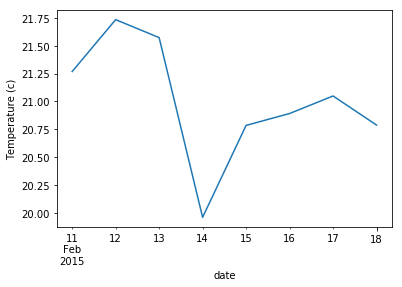

In [31]:
timeseries['Temperature'].resample('D').mean().plot()  # D is daily
plt.ylabel('Temperature (c)')

#### resampling frequencies

- min: minute
- H: hour
- D: day
- B: business day
- W: week
- M: month
- Q: quarter
- A: year

#### up sampling

date
2015-02-15 00:00:00    19.89
2015-02-15 00:00:01    19.89
2015-02-15 00:00:02    19.89
2015-02-15 00:00:03    19.89
2015-02-15 00:00:04    19.89
Freq: S, Name: Temperature, dtype: float64

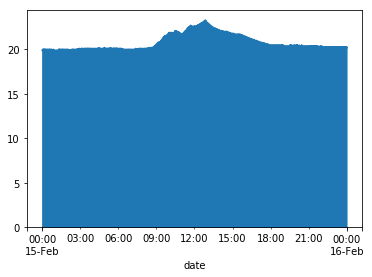

In [74]:
feb15_temp = timeseries.loc["Feb-15-2015", "Temperature"]
feb15_temp_sec = feb15_temp.resample('S').ffill()  # forward filling the up sample
feb15_temp_sec.plot(kind='Area')
feb15_temp_sec.head()

#### moving statistics
To calculate the running statistics (e.g. moving average), we use ``rolling(window=number of row).agg()``. Let's calculate the moving average of temperature on feb 15 over time.

In [55]:
filterings = {'date':feb15_temp_sec.index,'original':feb15_temp_sec.values}
for window in [30, 60, 1800, 3600, 7200]:
    name = str(window) + " sec"
    moving_average = feb15_temp_sec.rolling(window=window).mean().fillna(0)
    filterings[name] = moving_average
filtered_data = pd.DataFrame(filterings).set_index('date')


Text(0,0.5,'Temperature')

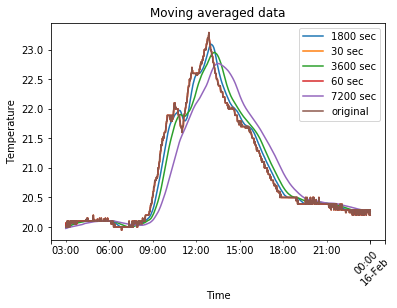

In [75]:
_ = filtered_data.loc['Feb-15-2015 3:00:00':,:].plot(title='Moving averaged data')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Temperature')

##### Accessing date time through ``dt`` attribute.

In [69]:
# active hours of the days
from collections import Counter
dates = timeseries.reset_index()['date']
hours = dates.dt.hour  # dt attribute gives access to all the hours
c = Counter(hours)
actives = c.most_common(12)

for i, j in actives:
    print("Hour {} :\t {} activities".format(i,j))

Hour 16 :	 427 activities
Hour 19 :	 427 activities
Hour 22 :	 427 activities
Hour 1 :	 427 activities
Hour 4 :	 427 activities
Hour 7 :	 427 activities
Hour 15 :	 420 activities
Hour 18 :	 420 activities
Hour 21 :	 420 activities
Hour 0 :	 420 activities
Hour 3 :	 420 activities
Hour 6 :	 420 activities


In [70]:
# time zone manipulation: localizing using tz_localize, and converting using
# tz_convert
print(dates.head())
dates = dates.dt.tz_localize('US/Eastern').dt.tz_convert('US/Central')

0   2015-02-11 14:48:00
1   2015-02-11 14:49:00
2   2015-02-11 14:50:00
3   2015-02-11 14:51:00
4   2015-02-11 14:51:59
Name: date, dtype: datetime64[ns]


In [71]:
dates.head()

0   2015-02-11 13:48:00-06:00
1   2015-02-11 13:49:00-06:00
2   2015-02-11 13:50:00-06:00
3   2015-02-11 13:51:00-06:00
4   2015-02-11 13:51:59-06:00
Name: date, dtype: datetime64[ns, US/Central]

# Time series analysis
Data that changes over time, waveforms, fluctuation of stock, sensors.
Each data has intrinsic timestamp related to it. It can be day, year, or milisecond samples of a sensor data.

Time series analysis with machine learning allows:

- seeing patterns in the data that we could not see before
- predicting future
- automate future

What is different with time series:
- time series changes over time: this is a great pattern, changing over time

How to approach time series:
- What features to exptract
- What models to use?
- What prediction/validation to use

In [79]:
file_location = r"C:\Users\Amin\Dropbox\Deep Learning on High Impedance Faults\Data\HIF Real-world\Original\50Hz\All the Data\'"
ia = scipy.io.loadmat(file_location[:-1] + 'asf13_ia.mat')['asf13_ia']
va = scipy.io.loadmat(file_location[:-1] + 'asf13_va.mat')['asf13_va']
time =np.arange(0, len(ia))/24760*1000 #ms
data_np = np.hstack((time.reshape((370051, 1)), ia,va))

In [80]:
data = pd.DataFrame(data_np, columns=['Time','Current','Voltage'])
data.set_index('Time',inplace=True)

In [81]:
data.head()

,Current,Voltage
Time,,
0.000000,0.608236,3.632328
0.040388,0.495333,3.693893
0.080775,0.648743,3.759429
0.121163,0.690973,3.801134
0.161551,0.681493,3.645435


Text(0.5,1,'Current and voltage ')

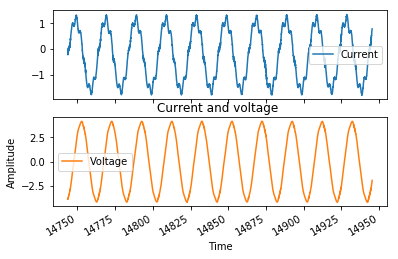

In [85]:
data.iloc[-5000:].plot(subplots = True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Current and voltage ')

### Machine learning on time-series data

We will perform some data analysis/modelling on time-series data.

In [88]:
from glob import glob
wave_folder = r'imported data/waves/data/'
files = glob(wave_folder + "murmur__2011*.wav")

In [89]:
files

['imported data/waves/data\\murmur__201101051104.wav',
 'imported data/waves/data\\murmur__201101051108.wav',
 'imported data/waves/data\\murmur__201101051114.wav',
 'imported data/waves/data\\murmur__201101180902.wav',
 'imported data/waves/data\\murmur__201102051443.wav',
 'imported data/waves/data\\murmur__201102052338.wav',
 'imported data/waves/data\\murmur__201103291548.wav',
 'imported data/waves/data\\murmur__201104021355.wav',
 'imported data/waves/data\\murmur__201104241315.wav',
 'imported data/waves/data\\murmur__201104291843.wav',
 'imported data/waves/data\\murmur__201106141148.wav',
 'imported data/waves/data\\murmur__201108222221.wav',
 'imported data/waves/data\\murmur__201108222223.wav',
 'imported data/waves/data\\murmur__201108222224.wav',
 'imported data/waves/data\\murmur__201108222226.wav',
 'imported data/waves/data\\murmur__201108222227.wav',
 'imported data/waves/data\\murmur__201108222231.wav',
 'imported data/waves/data\\murmur__201108222232.wav',
 'imported

We will use librosa package to peform visualization, feature engineering, and modelling

In [94]:
import librosa as lr
print(help(lr))

Help on package librosa:

NAME
    librosa - Top-level module for librosa

PACKAGE CONTENTS
    beat
    cache
    core (package)
    decompose
    display
    effects
    feature (package)
    filters
    onset
    output
    segment
    sequence
    util (package)
    version

SUBMODULES
    audio
    constantq
    harmonic
    pitch
    spectrum
    time_frequency

DATA
    cache = CacheManager(location=None)

VERSION
    0.6.3

FILE
    c:\programdata\anaconda5\lib\site-packages\librosa\__init__.py


None


In [120]:
audio, sfreq = lr.load(files[0])
print("Sampling frequncy is {} Hz!".format(sfreq))

Sampling frequncy is 22050 Hz!


In [100]:
t = np.arange(0,len(audio)) / sfreq  # time stamp of the audio file

Text(0,0.5,'magnitude')

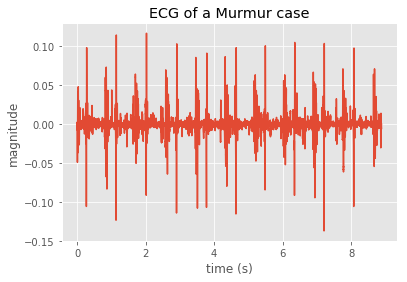

In [102]:
_ = plt.plot(t, audio)
plt.title('ECG of a Murmur case')
plt.xlabel('time (s)')
plt.ylabel('magnitude')

### Developing the model

- we will first import data
- perform simple feature engineering

In [121]:
n_data = 10 # number of waves to sample

files = glob(wave_folder + "*.wav")
normal_files = [file for file in files if "normal" in file][:n_data] #  sample first 10
abnormal_files = [file for file in files if file not in normal_files][:n_data] # sample first 10

In [118]:
print("There are {} normal case and {} abnormal ones".format(len(normal_files), len(abnormal_files)))

There are 10 normal case and 10 abnormal ones


In [170]:
def merger(file_list):
    data = []
    for file in file_list:
        audio, sfreq = lr.load(file)
        audio = audio[:50000].reshape((1,-1)) # largest window that can capture all data
        data.append(audio)
    t = np.arange(0, 50000) / sfreq
    return (t, np.array(data).reshape((10,-1)))  # briniging data into correct format

In [171]:
t, normal = merger(normal_files)

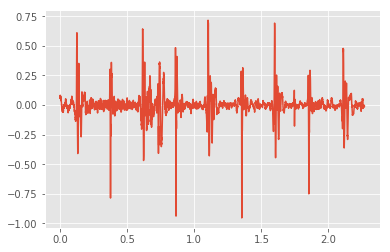

In [172]:
plt.plot(t, normal[1,:])

In [173]:
_, abnormal = merger(abnormal_files)

In [178]:
stacked_audio = np.vstack([normal, abnormal])
stacked_audio.shape

(20, 50000)

Text(0.5,0.98,'Left columns are normal cases, right columns are abnormal!')

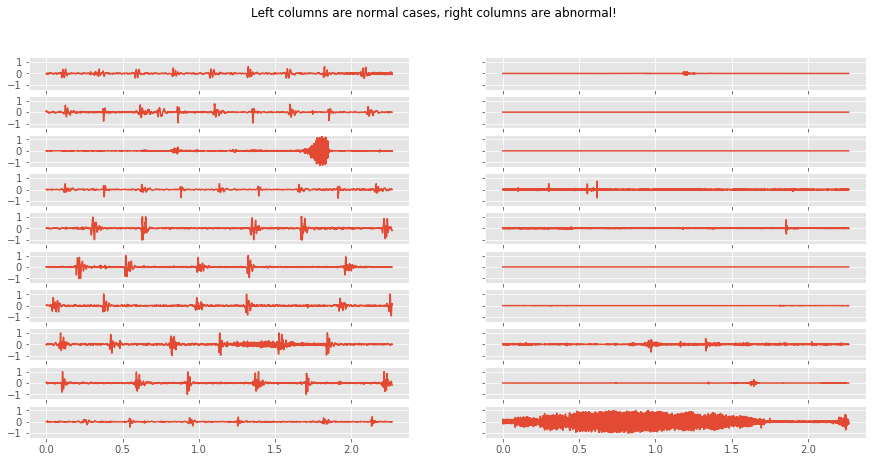

In [191]:
print("")
fig, axs = plt.subplots(10, 2, figsize=(15, 7), sharex=True, sharey=True)
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(t, iaudio)
fig.suptitle('Left columns are normal cases, right columns are abnormal!')

Text(0.5,1,'feature domain seperation of two classes')

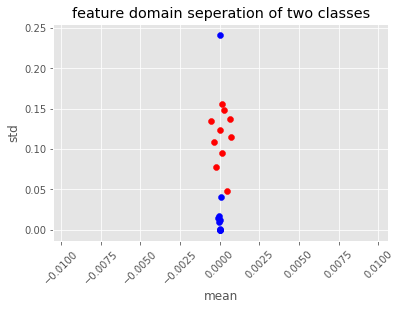

In [203]:
# now let's peform a very simple feature engineering
# we are calculating mean, standard deviation of each wavform
mean_normal = np.mean(normal, axis = 1)
mean_abnormal = np.mean(abnormal, axis = 1)
std_normal = np.std(normal, axis = 1)
std_abnormal = np.std(abnormal, axis = 1)
plt.scatter(mean_normal, std_normal, c='red')
plt.scatter(mean_abnormal, std_abnormal, c='blue')
plt.xlabel('mean')
plt.ylabel('std')
plt.xticks(rotation = 45)
plt.title('feature domain seperation of two classes')

In [210]:
# A very naive classifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
abnormal_df = pd.DataFrame({'mean':mean_abnormal, 'std':std_abnormal, 'normal':0})
normal_df = pd.DataFrame({'mean':mean_normal, 'std':std_normal, 'normal':1})
df = pd.concat((abnormal_df, normal_df))
y = df['normal']
X = df.drop('normal', axis = 1)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [213]:
model = LinearSVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy = np.mean(y_test == prediction)
print("This naiive classifier had an accuracy of {}".format(accuracy))
print("I guess not so naiive after all!!!")

This naiive classifier had an accuracy of 1.0
I guess not so naiive after all!!!


## Time series preprocessing, and  feature engineeing
- normalizing : l2 normalization of the curve
- envelope : smoothing noises over time (rolling window)
- tempogram

In [235]:
# first we need to normalize all rows so that they carry the same value
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(copy=False)
normalized_audio = normalizer.fit_transform(stacked_audio)
audio_df = pd.DataFrame(normalized_audio)
smoothed_audio = audio_df.T.apply(np.abs, axis=0).rolling(window=50).mean().T

Text(0.5,0,'Sample')

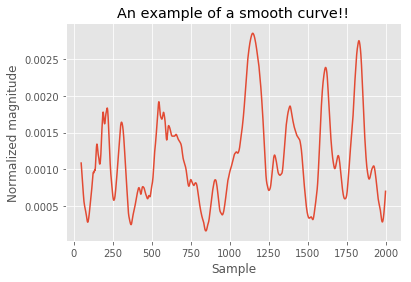

In [245]:
_ = smoothed_audio.T.iloc[:2000,0].plot()
plt.title('An example of a smooth curve!!')
plt.ylabel("Normalized magnitude")
plt.xlabel("Sample")

In [249]:
# now we are peforming classification on the extracted feature
f1 = smoothed_audio.apply(np.mean, axis =1)
f2 = smoothed_audio.apply(np.max, axis =1)
f3 = smoothed_audio.apply(np.min, axis =1)
f4 = smoothed_audio.apply(np.std, axis =1)

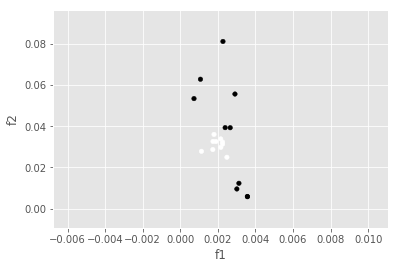

In [270]:
X = pd.DataFrame({"f1":f1,"f2":f2,"f3":f3,"f4":f4})
X.plot(x="f1",y="f2", kind ="scatter", c= y)

Continuing on feature extraction:
- Fast Fourier Transform : gives the frequency decompisition of the signal
- Short time fourier transform is windowed fourier transforms over time (at each rolling window calculate the spectrum)- > spectrogram is the square of STFTF
- Librosa has spectogram

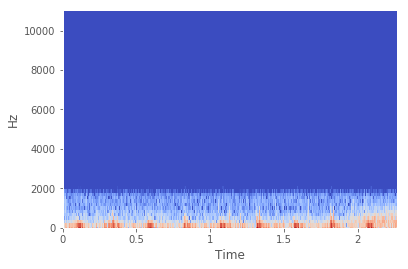

In [281]:
# calculating STFT
from librosa.core import stft, amplitude_to_db  # to perform lograrithmic view
from librosa.display import specshow
# calcuating STFT
audio = normal[0]
hop_length = 2 ** 4
size_windw = 2 ** 7
spec = stft(audio, hop_length=hop_length, n_fft=size_windw)

# convert into lograithmic view
spec_db = amplitude_to_db(np.abs(spec))

# visualize
specshow(spec_db, sr = sfreq, x_axis='time', y_axis = 'hz',
        hop_length=hop_length)

### feature engineering on spectograms
- centroids --> where most of energy of signal is located in time and frequency
- bandwidth --> the area in wich most frequecny compoenents exist

NameError: name 'times_spec' is not defined

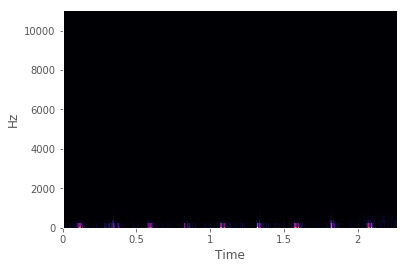

In [283]:
# Calculating spectral features
spec = np.abs(audio_spec)
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

# display these features on top of spectogram
ax = specshow(spec, x_axis = 'time', y_axis = 'hz', hop_length=hop_length)
ax.plot(times_spec, centroid)
ax.fill(times_spec, centroids - banwidths / 2, centroids + bandwidths / 2,
       alpha = 0.5)

In [284]:
spec.shape

(65, 3126)